In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv('crop.csv.csv')
data.head()
data.tail()

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link
4508,Pune,Black,130,80,150,7.0,1400,30,Sugarcane,MOP,https://youtu.be/2t5Am0xLTOo
4509,Pune,Black,135,80,150,7.0,1400,30,Sugarcane,MOP,https://youtu.be/2t5Am0xLTOo
4510,Pune,Black,140,80,150,7.0,1400,30,Sugarcane,MOP,https://youtu.be/2t5Am0xLTOo
4511,Pune,Black,145,80,150,7.0,1400,30,Sugarcane,MOP,https://youtu.be/2t5Am0xLTOo
4512,Pune,Black,150,80,150,7.0,1400,30,Sugarcane,MOP,https://youtu.be/2t5Am0xLTOo


In [3]:

data.isnull().sum()

District_Name    0
Soil_color       0
Nitrogen         0
Phosphorus       0
Potassium        0
pH               0
Rainfall         0
Temperature      0
Crop             0
Fertilizer       0
Link             0
dtype: int64

In [4]:
# Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District_Name  4513 non-null   object 
 1   Soil_color     4513 non-null   object 
 2   Nitrogen       4513 non-null   int64  
 3   Phosphorus     4513 non-null   int64  
 4   Potassium      4513 non-null   int64  
 5   pH             4513 non-null   float64
 6   Rainfall       4513 non-null   int64  
 7   Temperature    4513 non-null   int64  
 8   Crop           4513 non-null   object 
 9   Fertilizer     4513 non-null   object 
 10  Link           4513 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 388.0+ KB


In [5]:
# Exclude non-numeric columns
numeric_dataset = data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr = numeric_dataset.corr()
print(corr)

             Nitrogen  Phosphorus  Potassium        pH  Rainfall  Temperature
Nitrogen     1.000000    0.709539   0.584315  0.182850  0.269364    -0.010213
Phosphorus   0.709539    1.000000   0.573970  0.244945  0.225453    -0.055303
Potassium    0.584315    0.573970   1.000000  0.075110  0.445671     0.053413
pH           0.182850    0.244945   0.075110  1.000000  0.097884    -0.002949
Rainfall     0.269364    0.225453   0.445671  0.097884  1.000000     0.315045
Temperature -0.010213   -0.055303   0.053413 -0.002949  0.315045     1.000000


<Axes: >

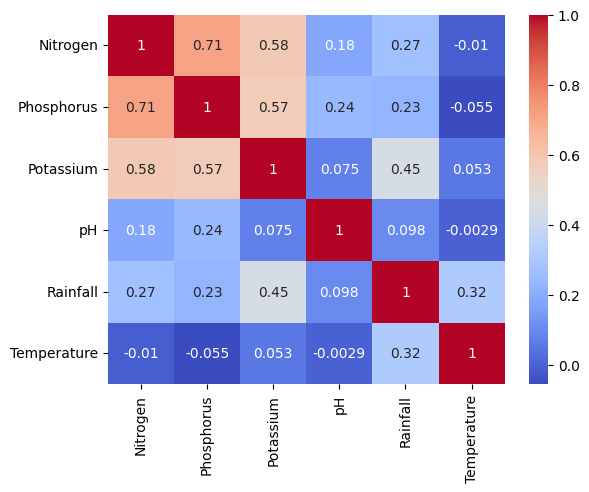

In [6]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True , cmap='coolwarm')

In [7]:
data['Soil_color'].unique()


array(['Black', 'Red ', 'Medium Brown', 'Dark Brown', 'Red',
       'Light Brown', 'Reddish Brown'], dtype=object)

In [8]:
data['District_Name'].unique()

array(['Kolhapur', 'Solapur', 'Satara', 'Sangli', 'Pune'], dtype=object)

In [9]:
#Define a mapping dictionary for district_name_Color
District_Name_mapping = {
    'Kolhapur': 1, 
    'Solapur': 2, 
    'Satara': 3, 
    'Sangli': 4, 
    'Pune': 5

}
# Map the district_name values to integers
data['District_Name'] = data['District_Name'].map(District_Name_mapping)
data.head(5)

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link
0,1,Black,75,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
1,1,Black,80,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
2,1,Black,85,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
3,1,Black,90,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
4,1,Black,95,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo


In [10]:
#Define a mapping dictionary for Soil_Color
soil_color_mapping = {
    'Black': 1,
    'Red ': 2,  # Notice the trailing space, keep it as it appears in the data
    'Medium Brown': 3,
    'Dark Brown': 4,
    'Red': 5,
    'Light Brown': 6,
    'Reddish Brown': 7

}
# Map the Soil_Color values to integers
data['Soil_color'] = data['Soil_color'].map(soil_color_mapping)
data.head(5)

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link
0,1,1,75,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
1,1,1,80,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
2,1,1,85,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
3,1,1,90,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
4,1,1,95,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo


In [11]:
data.head(5)

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link
0,1,1,75,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
1,1,1,80,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
2,1,1,85,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
3,1,1,90,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
4,1,1,95,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo


In [12]:
data['Crop'].unique()

array(['Sugarcane', 'Jowar', 'Cotton', 'Rice', 'Wheat', 'Groundnut',
       'Maize', 'Tur', 'Urad', 'Moong', 'Gram', 'Masoor', 'Soybean',
       'Ginger', 'Turmeric', 'Grapes'], dtype=object)

In [13]:

# Define a mapping dictionary for Crop
crop_mapping = {
    'Sugarcane': 1,
    'Jowar': 2,
    'Cotton': 3,
    'Rice': 4,
    'Wheat': 5,
    'Groundnut': 6,
    'Maize': 7,
    'Tur': 8,
    'Urad': 9,
    'Moong': 10,
    'Gram': 11,
    'Masoor': 12,
    'Soybean': 13,
    'Ginger': 14,
    'Turmeric': 15,
    'Grapes': 16
}

# Map the Crop values to integers
data['Crop'] = data['Crop'].map(crop_mapping)
data.head()

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link
0,1,1,75,50,100,6.5,1000,20,1,Urea,https://youtu.be/2t5Am0xLTOo
1,1,1,80,50,100,6.5,1000,20,1,Urea,https://youtu.be/2t5Am0xLTOo
2,1,1,85,50,100,6.5,1000,20,1,Urea,https://youtu.be/2t5Am0xLTOo
3,1,1,90,50,100,6.5,1000,20,1,Urea,https://youtu.be/2t5Am0xLTOo
4,1,1,95,50,100,6.5,1000,20,1,Urea,https://youtu.be/2t5Am0xLTOo


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [15]:
X = data[['Soil_color', 'Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall', 'Temperature','District_Name']]
y = data['Crop']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and fit the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Make predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [17]:
# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

print("\nClassification Report for Testing Data:\n", classification_report(y_test, y_test_pred))

Training Accuracy: 1.0
Testing Accuracy: 0.9988925802879292

Classification Report for Testing Data:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       205
           2       1.00      1.00      1.00        66
           3       1.00      1.00      1.00       146
           4       1.00      1.00      1.00        64
           5       1.00      0.99      1.00       176
           6       1.00      1.00      1.00        41
           7       0.99      1.00      0.99        72
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        18
          10       1.00      1.00      1.00        13
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        12
          16       1.00      1.00

In [18]:

# Reverse mapping from integer to crop name
reverse_crop_mapping = {v: k for k, v in crop_mapping.items()}

# Function to predict crop and return crop name
def predict_crop(soil_color, nitrogen, phosphorus, potassium, pH, rainfall, temperature, district_name):
    # Map the input string values to their respective integers
    soil_color = soil_color_mapping.get(soil_color, 0)
    district_name = District_Name_mapping.get(district_name, 0)
    
    input_data = pd.DataFrame([{
        'Soil_color': soil_color,
        'Nitrogen': nitrogen,
        'Phosphorus': phosphorus,
        'Potassium': potassium,
        'pH': pH,
        'Rainfall': rainfall,
        'Temperature': temperature,
        'District_Name': district_name
    }])
    
    prediction = rf_model.predict(input_data)
    crop_name = reverse_crop_mapping[prediction[0]]
    return crop_name

# Input values for prediction
soil_color = "Black"
nitrogen = 50
phosphorus = 75
potassium = 100
pH = 6.5
rainfall = 1000
temperature = 20
district_name = "Kolhapur"

# Get the predicted crop name
predicted_crop = predict_crop(soil_color, nitrogen, phosphorus, potassium, pH, rainfall, temperature, district_name)
print("Predicted Crop:", predicted_crop)

Predicted Crop: Sugarcane


In [19]:

import pickle
# Save the trained model to a file using pickle
with open('rf_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

print("Model saved successfully!")

Model saved successfully!
